# TUGAS KLASIFIKASI DATA PROYEK SAINS DATA - B

Nama  : Anas Khoiri A    
NIM   : 210411100025  
Kelas : B  

# 1. BUSSINESS UNDERSTANDING

**Klasifikasi Dataset Kanker Payudara**

tujuannya: untuk membangun model klasifikasi yang dapat memprediksi apakah seorang terdiagnosis kanker payudara ganas atau jinak.
karena ketika seorang hendak untuk mengetahui apakah seorang tersebut terdiagnosis kanker payudara maka dengan melakukan pengecekan pada setiap atribut yang ada di data maka orang tersebut akan tau apakah dia terdiagnosis kanker atau tidak. jadi jika seorang tersebut secepatnya tau bahwa dia terdiagnosis kanker payudara maka pengobatan akan segera di lakukan. hal ini yang membantu meningkatkan keselamatan pasien. 

penjelasan setiap fitur:
- Age (Usia): Ini adalah usia pasien dalam tahun. (tahun/year)

- BMI (Body Mass Index): Ini adalah indeks massa tubuh (BMI) pasien, yang mengukur hubungan antara berat badan dan tinggi badan. Nilai ini digunakan untuk mengevaluasi status berat badan pasien. (Kg/m^2)

- Glucose (Glukosa): Ini adalah konsentrasi glukosa dalam darah pasien, yang diukur dalam mg/dL. Kadar glukosa darah sering digunakan untuk mengawasi fungsi metabolisme gula dalam tubuh.(Mg/dl)

- Insulin: Ini adalah kadar insulin dalam darah pasien, yang diukur dalam μU/mL. Insulin adalah hormon yang berperan dalam mengendalikan kadar glukosa darah.(µU/Ml)

- HOMA (Homeostasis Model Assessment): Ini adalah nilai HOMA yang digunakan untuk mengukur resistensi insulin dan fungsi sel beta pankreas dalam menghasilkan insulin. HOMA adalah perkiraan berdasarkan kadar glukosa dan insulin dalam darah. (%)

- Leptin: Leptin adalah hormon yang diproduksi oleh sel lemak dalam tubuh. Konsentrasi leptin dalam darah dapat berhubungan dengan berat badan dan metabolisme lemak. (ng/Ml)

- Adiponectin: Adiponectin adalah hormon yang diproduksi oleh jaringan lemak dan berperan dalam regulasi metabolisme lemak dan sensitivitas insulin. (µg/Ml)

- Resistin: Resistin adalah protein yang diproduksi oleh jaringan lemak dan berperan dalam regulasi peradangan dan resistensi insulin. (ng/Ml)

- MCP.1 (Monocyte Chemoattractant Protein-1): MCP.1 adalah protein yang berperan dalam mengarahkan sel darah putih (monosit) ke daerah peradangan dalam tubuh. Ini dapat menjadi indikator peradangan dalam tubuh. (pg/dl)

- Classification (Klasifikasi): Ini adalah atribut target yang digunakan untuk mengklasifikasikan pasien. (1: Jinak, 2: Ganas)






# 2. DATA UNDERSTANDING

Dataset berupa kumpulan data test Kanker Payudara yang dari beberapa pasien. dataset diperoleh dari website UC Irvine Machine Learning Repository dan di upload pada 3 Mei 2018. Terdapat 10 prediktor, semuanya kuantitatif, dan variabel dependen biner, yang menunjukkan ada tidaknya kanker payudara. Prediktornya adalah data antropometri dan parameter yang dapat dikumpulkan dalam analisis darah rutin. Model prediksi berdasarkan prediktor tersebut, jika akurat, berpotensi digunakan sebagai biomarker kanker payudara.

Adapun hal - hal yang perlu dilakukan untuk memahami data, yakni
1. Mendeskripsikan setiap fitur pada data
    * tipe data
    * deskripsi data
2. Mengidentifikasi missing values setiap fitur atau kolom
3. Eksplorasi data (grafikan fitur)
4. Mengidentifikasi outlier
5. Mengidentifikasi jumlah data (proporsi data perkelas -untuk mengetahui balancing dataset atau keseimbangan data per kelas)

## Load Dataset

meng import/memanggil dataset kanker payudara

In [33]:
import pandas as pd

data = pd.read_excel('kankerpayudara.xlsx')
data.head(5)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [34]:
# Rincian dataset (banyak data dan kolom)

print("Banyaknya data : ", data.shape[0])
print("Banyaknya kolom : ", data.shape[1])

Banyaknya data :  116
Banyaknya kolom :  10


In [35]:
kelas_counts = data['Classification'].value_counts()
print(kelas_counts)

Classification
2    64
1    52
Name: count, dtype: int64


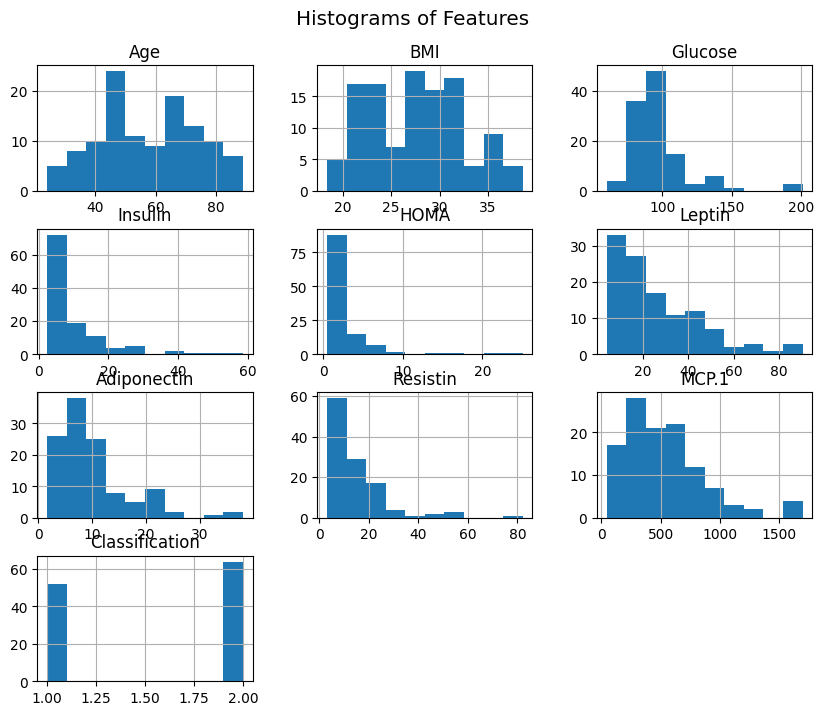

In [36]:
import matplotlib.pyplot as plt


data.hist(figsize=(10, 8))
plt.suptitle('Histograms of Features', x=0.5, y=0.95, ha='center', fontsize='x-large')
plt.show() 

## Mendeskripsikan setiap fitur

mendeskripsikan fitur apa saja yang ada pada fitur dataset kanker payudara

In [37]:
data.columns

Index(['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin',
       'Resistin', 'MCP.1', 'Classification'],
      dtype='object')

### Tipe data

In [38]:
data.dtypes

Age                 int64
BMI               float64
Glucose             int64
Insulin           float64
HOMA              float64
Leptin            float64
Adiponectin       float64
Resistin          float64
MCP.1             float64
Classification      int64
dtype: object

Berikut Macam - Macam Data yang ada pada data ini.   

1. Tipe nominal   
    - memiliki value 1 yang melambangkan ya dan 0 yang melambangkan tidak.
        > Pada data ini mencakup fitur : *'Classification'* 
    - mencakup tipe data numeric.
        > yakni pada fitur *'Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin',
       'Resistin', 'MCP.1'*

### Deskripsi data

penjelasan setiap fitur:
- Age (Usia): Ini adalah usia pasien dalam tahun. (tahun/year)

- BMI (Body Mass Index): Ini adalah indeks massa tubuh (BMI) pasien, yang mengukur hubungan antara berat badan dan tinggi badan. Nilai ini digunakan untuk mengevaluasi status berat badan pasien. (Kg/m^2)
	- Kurang dari 18,5 = badan kurus/kurang
	- 18,5 - 22,9 = badan ideal/normal
	- 23 - 29,9 = badan gemuk/berlebih (cenderung obesitas)
	- Lebih dari 30 = obesitas
  - Untuk cara pengukuran dilakukan (berat badan)/(tinggi badan)^2

- Glucose (Glukosa): Ini adalah konsentrasi glukosa dalam darah pasien, yang diukur dalam mg/dL. Kadar glukosa darah sering digunakan untuk mengawasi fungsi metabolisme gula dalam tubuh.(Mg/dl)
	-	lebih dari 100 mg/dL akurasi bisa berbeda ± 15 mg/dL
	-  kurang dari 100 mg/dL akurasi bisa berbeda ± 15%

- Insulin: Ini adalah kadar insulin dalam darah pasien, yang diukur dalam μU/mL. Insulin adalah hormon yang berperan dalam mengendalikan kadar glukosa darah.(µU/Ml)

- HOMA (Homeostasis Model Assessment): Ini adalah nilai HOMA yang digunakan untuk mengukur resistensi insulin dan fungsi sel beta pankreas dalam menghasilkan insulin. HOMA adalah perkiraan berdasarkan kadar glukosa dan insulin dalam darah. (%)

- Leptin: Leptin adalah hormon yang diproduksi oleh sel lemak dalam tubuh. Konsentrasi leptin dalam darah dapat berhubungan dengan berat badan dan metabolisme lemak. (ng/Ml)

- Adiponectin: Adiponectin adalah hormon yang diproduksi oleh jaringan lemak dan berperan dalam regulasi metabolisme lemak dan sensitivitas insulin. (µg/Ml)

- Resistin: Resistin adalah protein yang diproduksi oleh jaringan lemak dan berperan dalam regulasi peradangan dan resistensi insulin. (ng/Ml)

- MCP.1 (Monocyte Chemoattractant Protein-1): MCP.1 adalah protein yang berperan dalam mengarahkan sel darah putih (monosit) ke daerah peradangan dalam tubuh. Ini dapat menjadi indikator peradangan dalam tubuh. (pg/dl)

- Classification (Klasifikasi): Ini adalah atribut target yang digunakan untuk mengklasifikasikan pasien. (1: Jinak, 2: Ganas)



## Mengidentifikasi missing value

### Missing value

mencari missing value atau data yang tidak bernilai pada dataset kanker payudara

- data.isna(): Fungsi ini menghasilkan DataFrame yang memiliki struktur yang sama dengan data, tetapi dengan nilai boolean (True atau False) yang menunjukkan apakah setiap sel dalam DataFrame data adalah nilai yang hilang atau tidak. Nilai True menunjukkan bahwa sel tersebut merupakan nilai yang hilang, sedangkan nilai False menunjukkan bahwa sel tersebut memiliki nilai.
- .any(): Metode ini kemudian digunakan untuk menerapkan fungsi any ke setiap kolom DataFrame hasil dari data.isna(). Ini menghasilkan Seri (Series) dengan indeks berupa nama kolom, dan nilai True atau False untuk setiap kolom, menunjukkan apakah kolom tersebut memiliki setidaknya satu nilai yang hilang atau tidak.

In [39]:
# Menghitung apakah ada nilai yang hilang dalam setiap kolom
missing_values = data.isna().any()

# Menampilkan hasil
print("Apakah ada nilai yang hilang dalam setiap kolom:")
print(missing_values)

Apakah ada nilai yang hilang dalam setiap kolom:
Age               False
BMI               False
Glucose           False
Insulin           False
HOMA              False
Leptin            False
Adiponectin       False
Resistin          False
MCP.1             False
Classification    False
dtype: bool


Noted : tidak ada *missing value* pada data

### Duplikat data

mencari duplikat data yang terjadi pada dataset kanker payudara dengan menggunakan 

- data.duplicated(): Fungsi ini digunakan untuk menghasilkan serangkaian nilai boolean yang menunjukkan apakah setiap baris dalam DataFrame data adalah duplikat atau tidak. Nilai True menunjukkan bahwa baris tersebut merupakan duplikat, sementara nilai False menunjukkan bahwa baris tersebut tidak duplikat.
- .sum(): Metode ini kemudian digunakan untuk menjumlahkan nilai-nilai boolean yang dihasilkan oleh duplicated(). Jika suatu baris adalah duplikat, nilai booleannya adalah True yang dihitung sebagai 1, dan jika bukan duplikat, nilai booleannya adalah False yang dihitung sebagai 0.

In [40]:
jumlah_duplikat = data.duplicated().sum()

# Menampilkan jumlah data yang duplikat
print("Jumlah data yang duplikat:", jumlah_duplikat)

Jumlah data yang duplikat: 0


Noted : terdapat beberapa baris data yang sama, sehingga data tersebut harus dihilangkan untuk menghindari adanya data yang redundan

## Mengidentifikasi Outlier

Mencari data outlier pada dataset adalah langkah penting dalam analisis data untuk mengidentifikasi nilai-nilai yang berbeda secara signifikan dari pola umum dataset. Outlier adalah nilai yang jauh dari nilai-nilai lainnya dan dapat memiliki dampak besar pada hasil analisis statistik. Pada dataset kali ini saya menggunakan Local Outlier Factor untuk mencari outlier yang ada pada dataset kanker payudara tersebut.

### Local Outlier Factor

- Pengertian Local Outlier Factor(LOF):

LOF mengukur sejauh mana suatu observasi berbeda dari tetangga-tetangganya dalam hal kepadatan. Outlier diidentifikasi berdasarkan perbandingan antara kepadatan observasi tersebut dan kepadatan tetangganya. Jika suatu observasi memiliki LOF yang tinggi, maka itu dianggap sebagai outlier.

- Langkah-langkah Local Outlier Factor (LOF):
1. Hitung Jarak Antar Data
dimana jarak yang dihitung adalah jarak titik yang akan dievaluasi dengan semua titik didalam satu baris. Perhitungan Jarak dilakukan menggunakan perhitungan jarak euclidean.

    $$
    \text{distance}(p, q) = \sqrt{\sum_{i=1}^{n}(p_i - q_i)^2}
    $$
    dimana :
    - p = titik yang akan dievaluasi
    - q = titik selain titik p 

2. Hitung Kepadatan Lokal
Setelah jarak diketahui, maka selanjutnya kepadatan lokal dari titik data tersebut perlu dihitung. Kepadatan lokal dapat dihitung dengan membandingkan jumlah titik-titik tetangga dalam jarak tertentu (radius) terhadap titik data yang sedang dievaluasi.

    $$
    \text{Local Density}(p) = \frac{\text{jumlah tetangga dalam radius}}{\text{jumlah total data}}
    $$

3. Hitung Local Reachability Density(LRD)
Hitung kepadatan jarak (reachability distance) dari titik data (p) terhadap tetangganya (q).
Local Reachability Density dari titik p terhadap tetangga q dihitung sebagai rata-rata dari jarak antara q dan p terhadap tetangga q:

    $$
    \text{reachdist}(p, q) = \max(\text{distance}(p, q), \text{radius})
    $$

    $$
    \text{Local Reachability Density}(p) = \frac{1}{\text{jumlah tetangga}} \sum_{q \in N_{\text{radius}}(p)} \frac{\text{reachdist}(p, q)}{\text{density}(q)}
    $$
    dimana:
    - N radius(p) adalah himpunan tetangga dalam radius tertentu radius dari titik p.
    - density(q) adalah kepadatan lokal dari tetangga q.

4. Hitung Nilai LOF
LOF dari suatu titik data (p) dihitung sebagai rasio dari rata-rata Local Reachability Density dari tetangganya terhadap kepadatan lokalnya sendiri:
    $$
    \text{LOF}(p) = \frac{1}{\text{jumlah tetangga}} \sum_{q \in N_{\text{radius}}(p)} \frac{\text{Local Reachability Density}(q)}{\text{Local Reachability Density}(p)}
    $$

- contoh kasus penggunaan outlier

| X   | Y  |
| --- | -- |
| 2   | 6  |
| 4   | 7  |
| 6   | 9  |
| 8   | 5  |
| 10  | 12 |

Sekarang, kita akan mengikuti langkah-langkah yang sama untuk menghitung Local Outlier Factor (LOF):

Langkah 1: Hitung Jarak Antar Data dengan Radius 5
| X  | Y  | Jarak            |
|----|----|------------------|
| 2  | 6  | 3.16 ; 3.61 ; 4.24|
| 4  | 7  | 2.24 ; 2.83 ; 3.61|
| 6  | 9  | 2.24 ; 3.61 ; 4.47|
| 8  | 5  | 4.47 ; 5.1        |
| 10 | 12 | 3.61 ; 5.83       |

Langkah 2: Hitung Jumlah Tetangga dalam Radius 5
| X   | Y   | Jumlah Tetangga |
| --- | --- | --------------- |
| 2   | 6   | 3               |
| 4   | 7   | 3               |
| 6   | 9   | 3               |
| 8   | 5   | 2               |
| 10  | 12  | 2               |

Langkah 3: Hitung Local Reachability Density
| X  | Y  | Jarak                                     |
|----|----|-------------------------------------------|
| 2  | 6  | (3.16 + 3.61 + 4.24) / 3 = 3.67           |
| 4  | 7  | (2.24 + 2.83 + 3.61) / 3 = 2.89           |
| 6  | 9  | (2.24 + 3.61 + 4.47) / 3 = 3.44           |
| 8  | 5  | (4.47 + 5.1) / 2 = 4.79                   |
| 10 | 12 | (3.61 + 5.83) / 2 = 4.72                  |

Langkah 4: Menghitung Nilai LOF Data
| X  | Y  | LOF                   |
|----|----|-----------------------|
| 2  | 6  | 1.28                  |
| 4  | 7  | 1.59                  |
| 6  | 9  | 1.20                  |
| 8  | 5  | 0.93                  |
| 10 | 12 | 0.84                  |

Dengan begitu, nilai yang kemungkinan menjadi outlier adalah baris 4 dan baris 5, karena nilai LOF-nya lebih rendah dari 1, yang menunjukkan bahwa kepadatan lokal titik tersebut lebih tinggi daripada rata-rata kepadatan lokal tetangganya.










In [41]:
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
# Membuat model LOF
clf = LocalOutlierFactor(n_neighbors=20)  # Jumlah tetangga yang digunakan
outlier_scores = clf.fit_predict(data)

# Menampilkan indeks outlier
outlier_indices = np.where(outlier_scores == -1)[0]
print("Indeks outlier:",outlier_indices)
print("Indeks outlier:",len( outlier_indices))

Indeks outlier: [  6  15  24  27  50  78  84  85  86  87  88 115]
Indeks outlier: 12


Noted : terdapat banyak data yang memiliki outlier, sehingga data tersebut harus dihilangkan

## Mengidentifikasi Jumlah Data

untuk mengindentifikasi jumlah data pada fitur classification atau data target pada dataset kanker payudara
- value_counts(): Ini adalah metode dari pandas yang digunakan untuk menghitung frekuensi kemunculan setiap nilai unik dalam kolom 'Classification'. Dengan kata lain, ini menghitung berapa kali setiap nilai muncul dalam kolom tersebut.

In [42]:
target_no_outliers = data['Classification'].value_counts()

# Menampilkan jumlah target pada data tanpa outlier
print("Jumlah data pada tanpa outlier:")
print(target_no_outliers)

Jumlah data pada tanpa outlier:
Classification
2    64
1    52
Name: count, dtype: int64


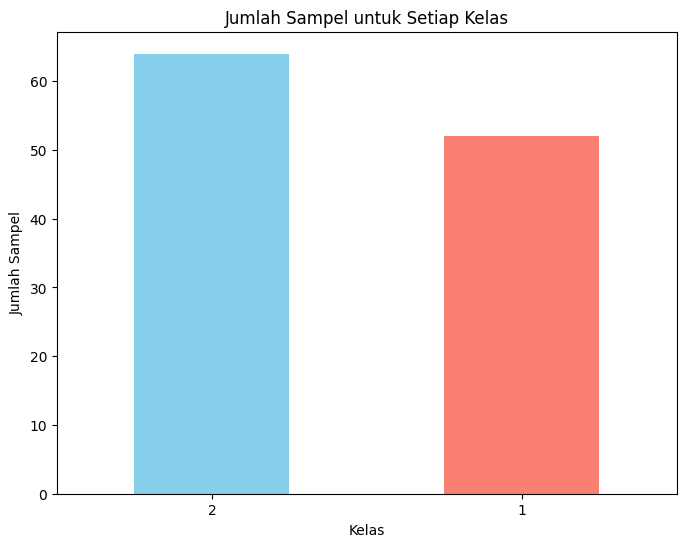

In [70]:
import matplotlib.pyplot as plt

kelas_counts = data['Classification'].value_counts()

# Visualisasi
plt.figure(figsize=(8, 6))
kelas_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Jumlah Sampel untuk Setiap Kelas')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Sampel')
plt.xticks(rotation=0)
plt.show()


## Eksplorasi Data

Mengindentifikasi fitur - fitur yang ada pada dataset kanker payudara dengan tujuan menggunakan seleksi fitur dan menampilkan grafik

### Fitur beserta presentase kepentingannya

mencari skor pada setiap fitur dengan menggunakan metode SelectKBeast dengan mencari nilai mutual information dari setiap fitur.

- MUTUAL INFORMATION

Mutual information (MI) adalah metrik yang berguna dalam pemilihan fitur karena mengukur seberapa banyak informasi yang saling terkait antara fitur (variabel independen) dengan variabel target (variabel dependen). Dalam konteks pemilihan fitur, kita ingin mempertahankan fitur-fitur yang memiliki hubungan yang kuat atau tinggi dalam menjelaskan variabel target.

Rumus Mutual Information (MI) between X and Y:

$$
\text{MI}(X;Y) = \sum_{x \in X} \sum_{y \in Y} p(x, y) \log \left(\frac{p(x, y)}{p(x) \cdot p(y)}\right)
$$


Dimana:
- MI(X;Y) adalah mutual information antara variabel X dan Y.
- p(x,y) adalah probabilitas bersama dari X=x dan Y=y.
- p(x) adalah probabilitas margina X=x.
- p(y) adalah probabilitas margina Y=y.




In [43]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split

# memisahkan kolom fitur dan target
fitur = data.drop(columns=['Classification'], axis =1)
target = data['Classification']

# Buat objek SelectKBest dengan mutual_info_classif sebagai fungsi skor
k_best = SelectKBest(score_func=mutual_info_classif, k='all')  # 'all' berarti akan mempertahankan semua fitur

# Hitung skor fitur
k_best.fit(fitur, target)
scores = k_best.scores_

# Dapatkan nama fitur dari kolom data Anda
fitur_names = fitur.columns

# Tampilkan skor fitur berserta namanya
for i, (score, fitur_name) in enumerate(zip(scores, fitur_names)):
    print(f"Fitur {i}: {fitur_name}, Skor: {score}")

Fitur 0: Age, Skor: 0.13081809850753978
Fitur 1: BMI, Skor: 0.0
Fitur 2: Glucose, Skor: 0.08175767880050189
Fitur 3: Insulin, Skor: 0.0
Fitur 4: HOMA, Skor: 0.016421497909047345
Fitur 5: Leptin, Skor: 0.0
Fitur 6: Adiponectin, Skor: 0.0
Fitur 7: Resistin, Skor: 0.057669223773980205
Fitur 8: MCP.1, Skor: 0.0


### Grafik fitur dan tingkat pentingnya

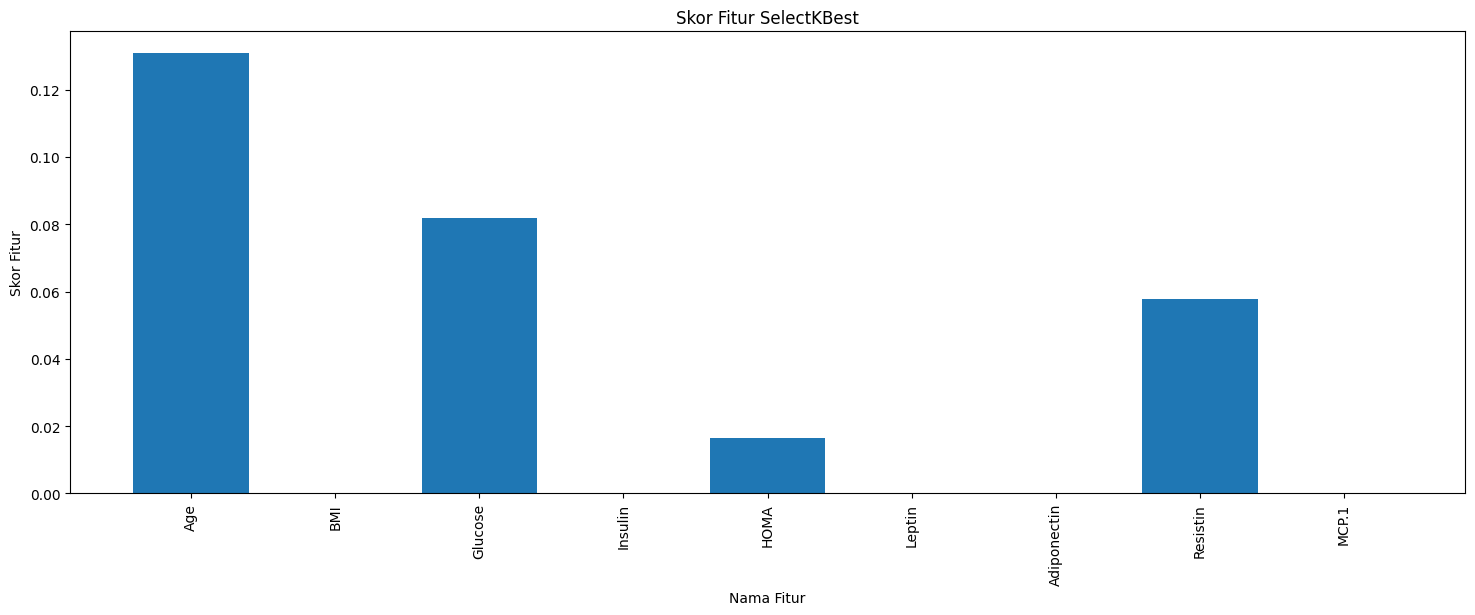

In [44]:
import matplotlib.pyplot as plt

# Tampilkan skor fitur dalam grafik
plt.figure(figsize=(18, 6))
plt.bar(fitur_names, scores)
plt.xlabel("Nama Fitur")
plt.ylabel("Skor Fitur")
plt.title("Skor Fitur SelectKBest")
plt.xticks(rotation=90)
plt.show()

**Kesimpulan :**

1. Data tidak memiliki _missing values_
2. Data memiliki banyak data redundan
3. Data memiliki banyak outlier
4. Perbandingan proposi data tiap target tidak beda jauh jadi tidak perlu untuk melakukan penyeimbangan data 
5. Hasil skoring fitur masih menggunakan data kotor sehingga perlu difilter kembali 

# 3. DATA PREPROCESSING

Setelah memahami data, akan dilakukan tahap preprocessing untuk menangani masalah pada data yang sudah didefinisikan pada data understanding, yakni:
1. Menghapus Data Duplikat
2. Menghapus Outlier

Setelah data siap, akan dilakukan :
1. Skoring tiap fitur kembali
2. Normalisasi Data
3. Eksplorasi Model

## Load Dataset

meng import/memanggil dataset kanker payudara

In [45]:
import pandas as pd

data = pd.read_excel('kankerpayudara.xlsx')
data.head(5)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [46]:
# Rincian dataset (banyak data dan kolom)

print("Banyaknya data : ", data.shape[0])
print("Banyaknya kolom : ", data.shape[1])

Banyaknya data :  116
Banyaknya kolom :  10


## Menghapus Data Duplikat

menghapus data duplikat yang telah di cari pada eksekusi sebelumnya yang dimana peroleh data duplikat = 0. Dikarenakan data duplikat bernilai 0 pada sisa data tetap dengan jumlah data yang asli

In [47]:
# Menghapus data yang duplikat
data_bersih = data.drop_duplicates()

print("Banyaknya sisa data : ", data_bersih.shape[0])

Banyaknya sisa data :  116


## Menghapus Outlier

In [48]:
# Menghapus data outlier dari DataFrame 'data'
data_cleaned = data.drop(outlier_indices)

# Menampilkan DataFrame setelah menghapus outlier
print("Data setelah menghapus outlier:")

# Rincian dataset (banyak data dan kolom)
print("Banyaknya data : ", data_cleaned.shape[0])


Data setelah menghapus outlier:
Banyaknya data :  104


## Menyeimbangkan Data Tiap Target

Pada hasil Mengidentifikasi jumlah data di peroleh jumlah target data 64 : 52. Namun setelah di lakukan Penghapusan Outlier maka di peroleh nilai sebagai berikut:

In [49]:
fitur = data_cleaned.drop(columns=['Classification'])
target = data_cleaned['Classification']

target.value_counts()

Classification
2    57
1    47
Name: count, dtype: int64

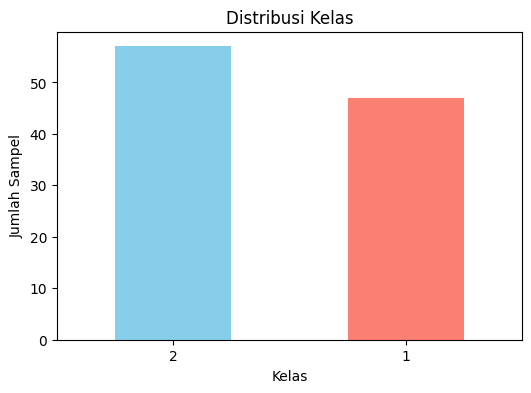

In [71]:
import matplotlib.pyplot as plt

# Visualisasi distribusi kelas
plt.figure(figsize=(6, 4))
target.value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribusi Kelas')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Sampel')
plt.xticks(rotation=0)
plt.show()


dikarenakan data classification tidak mengalami ketidakeseimabangan data, maka tidak perlu melakukan penyeimbangan data target.

## Eksplorasi Data (Skoring Fitur)

Mengindentifikasi fitur - fitur yang ada pada dataset kanker payudara dengan tujuan menggunakan seleksi fitur dan menampilkan grafik

In [72]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

fitur = data_cleaned.drop(columns=['Classification'], axis =1)
target = data_cleaned['Classification']
# Buat objek SelectKBest dengan mutual_info_classif sebagai fungsi skor
k_best = SelectKBest(score_func=mutual_info_classif, k='all')  # 'all' berarti akan mempertahankan semua fitur

# Hitung skor fitur
k_best.fit(fitur, target)
scores = k_best.scores_

# Dapatkan nama fitur dari kolom data Anda
fitur_names = fitur.columns

# Tampilkan skor fitur berserta namanya
for i, (score, fitur_name) in enumerate(zip(scores, fitur_names)):
    print(f"Fitur {i}: {fitur_name}, Skor: {score}")
    


Fitur 0: Age, Skor: 0.12297753765165353
Fitur 1: BMI, Skor: 0.0
Fitur 2: Glucose, Skor: 0.10980717436109777
Fitur 3: Insulin, Skor: 0.0
Fitur 4: HOMA, Skor: 0.027261437776825215
Fitur 5: Leptin, Skor: 0.0
Fitur 6: Adiponectin, Skor: 0.016256470521858413
Fitur 7: Resistin, Skor: 0.05710392435008105
Fitur 8: MCP.1, Skor: 0.0


Setelah dilakukan pencarian skor pada setiap fitur, terdapat 4 fitur yang tidak memiliki skor atau bernilai 0 dan terdapat 5 fitur yang memilki nilai. maka dari itu, selanjutnya akan di lakukan penghapusan fitur yang tidak memiliki nilai.

In [74]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif


k_best = SelectKBest(score_func=mutual_info_classif, k='all')  # 'all' berarti akan mempertahankan semua fitur

# Hitung skor fitur
k_best.fit(fitur, target)
scores = k_best.scores_

# Dapatkan nama fitur dari kolom data Anda
fitur_names = fitur.columns

indeks_fitur_hapus = [i for i, score in enumerate(scores) if score == 0]

# Tampilkan skor fitur berserta namanya
for i, (score, fitur_name) in enumerate(zip(scores, fitur_names)):
    print(f"Fitur {i}: {fitur_name}, Skor: {score}")
    

# Dapatkan indeks fitur yang memiliki skor 0

# Buang fitur-fitur yang memiliki skor 0 dari DataFrame fitur
fitur = fitur.drop(fitur.columns[indeks_fitur_hapus], axis=1)


Fitur 0: Age, Skor: 0.1597212159818704
Fitur 1: Glucose, Skor: 0.06071687672575954
Fitur 2: HOMA, Skor: 0.027261437776825215
Fitur 3: Adiponectin, Skor: 0.016256470521858413
Fitur 4: Resistin, Skor: 0.05710392435008105


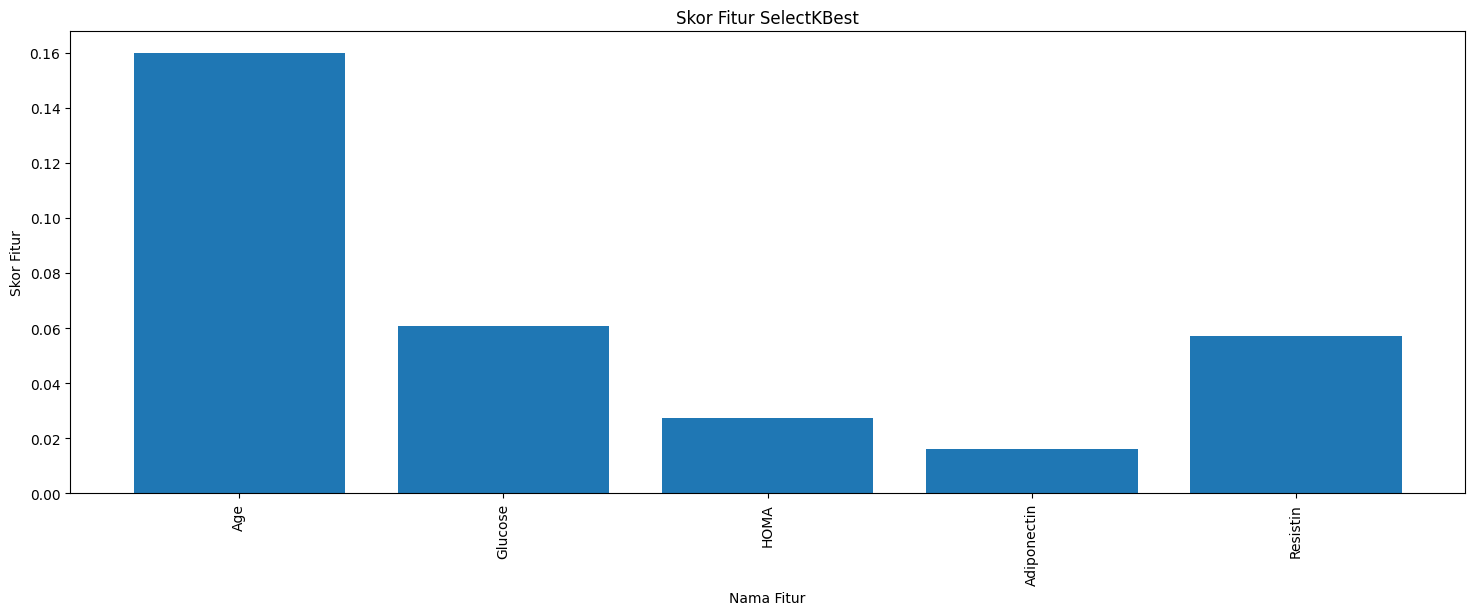

In [75]:
import matplotlib.pyplot as plt

# Tampilkan skor fitur dalam grafik
plt.figure(figsize=(18, 6))
plt.bar(fitur_names, scores)
plt.xlabel("Nama Fitur")
plt.ylabel("Skor Fitur")
plt.title("Skor Fitur SelectKBest")
plt.xticks(rotation=90)
plt.show()

In [52]:
dataset_baru = pd.concat([fitur, target], axis=1)

# Display the combined table
print(dataset_baru)

     Age  Glucose      HOMA  Adiponectin  Resistin  Classification
0     48       70  0.467409     9.702400   7.99585               1
1     83       92  0.706897     5.429285   4.06405               1
2     82       91  1.009651    22.432040   9.27715               1
3     68       77  0.612725     7.169560  12.76600               1
4     86       92  0.805386     4.819240  10.57635               1
..   ...      ...       ...          ...       ...             ...
110   54      119  3.495982     8.010000   5.06000               2
111   45       92  0.755688    12.100000  10.96000               2
112   62      100  1.117400    21.420000   7.32000               2
113   65       97  1.370998    22.540000  10.33000               2
114   72       82  0.570392    33.750000   3.27000               2

[104 rows x 6 columns]


## Split Data

proses memisahkan dataset menjadi dua atau lebih bagian yang berbeda. Tujuan umumnya adalah untuk menggunakan satu bagian data sebagai data pelatihan (training data) untuk melatih model, dan bagian lainnya sebagai data pengujian (testing data) untuk menguji kinerja model.

In [76]:
import pandas as pd

# Menyimpan DataFrame ke dalam file CSV
dataset_baru.to_excel('dataset_baru.xlsx', index=False)

In [55]:
from sklearn.model_selection import train_test_split

# melakukan pembagian dataset, dataset dibagi menjadi 80% data training dan 20% data testing
fitur_train, fitur_test, target_train, target_test = train_test_split(fitur, target, test_size = 0.2, random_state=42)

## Normalisasi Data

proses pengubahan nilai-nilai dalam suatu dataset menjadi rentang skala tertentu atau memastikan bahwa nilai-nilai tersebut mengikuti distribusi yang dapat meningkatkan kinerja beberapa algoritma machine learning.


### Menggunakan Standarscaler (zscore)

Normalisasi menggunakan Z-Score atau Standard Scaler adalah salah satu teknik normalisasi yang umum digunakan dalam pengolahan data dan machine learning. Normalisasi ini mengubah setiap nilai dalam dataset sehingga memiliki rata-rata nol dan deviasi standar satu. Hal ini membantu untuk menghilangkan perbedaan skala antar fitur, membuat data lebih mudah diinterpretasikan, dan meningkatkan performa beberapa algoritma machine learning. Berikut adalah penjelasan lebih detail tentang Normalisasi Standar atau Z-Score:

**Langkah-langkah Normalisasi Standar (Z-Score):**

1. **Hitung Rata-rata dan Deviasi Standar:** Untuk setiap fitur dalam dataset, hitung rata-rata $\mu$ dan deviasi standar $\sigma$.

   $ \mu = \frac{1}{N} \sum_{i=1}^{N} X_i $

   $ \sigma = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (X_i - \mu)^2} $

   Di sini, $N$ adalah jumlah total sampel, dan $X_i$ adalah nilai individu dalam suatu fitur.

2. **Normalisasi Setiap Nilai:** Untuk setiap nilai dalam setiap fitur, normalisasikan nilai tersebut menggunakan rumus Z-Score:

   $$ Z = \frac{X - \mu}{\sigma} $$

   Di sini, $X$ adalah nilai individu, $\mu$ adalah rata-rata fitur, dan $\sigma$ adalah deviasi standar fitur.

Berikut adalah contoh penggunaan metode Standard Scaling (Z-Score Normalization) pada data kolom X yang berbeda:

Diberikan tabel dengan kolom X berikut:

| X  | X' |
|----|----|
| 8  | 0  |
| 20 | 0  |
| 12 | 0  |
| 15 | 0  |
| 25 | 0  |

Langkah-langkah untuk melakukan normalisasi dengan metode Standard Scaling:

1. Hitung rata-rata (mean) dan standar deviasi (standard deviation) dari kolom X.
   - Rata-rata (mean) = $\frac{8 + 20 + 12 + 15 + 25}{5} = 16$
   - Standar Deviasi = $ \sqrt{\frac{\sum{(X_i - \text{mean})^2}}{N}} = \sqrt{\frac{(8-16)^2 + (20-16)^2 + (12-16)^2 + (15-16)^2 + (25-16)^2}{5}} \approx 5.477$

2. Normalisasikan setiap nilai dalam kolom X menggunakan rumus Z-Score Normalization:
   $ X' = \frac{X - \text{mean}(X)}{\text{std}(X)} $

   Sehingga, nilai X' untuk setiap baris dapat dihitung sebagai berikut:

   - ${X'}_1 = \frac{8 - 16}{5.477} \approx -1.46 $
   - ${X'}_2 = \frac{20 - 16}{5.477} \approx 0.73 $
   - ${X'}_3 = \frac{12 - 16}{5.477} \approx -0.73 $
   - ${X'}_4 = \frac{15 - 16}{5.477} \approx -0.22 $
   - ${X'}_5 = \frac{25 - 16}{5.477} \approx 1.64 $


   Sehingga, hasil normalisasi (X') untuk contoh ini adalah:

| X  | X'     |
|----|--------|
| 8  | -1.46  |
| 20 | 0.73   |
| 12 | -0.73  |
| 15 | -0.22  |
| 25 | 1.64   |

Ini adalah contoh penggunaan Standard Scaling pada data kolom X yang berbeda.

In [56]:
import pickle
from sklearn.preprocessing import StandardScaler

# membuat dan melatih objek StandardScaler
zscore_scaler = StandardScaler()
zscore_scaler.fit(fitur_train)

with open('zscorescaler_baru.pkl', 'wb') as file:
    pickle.dump(zscore_scaler, file)
# menerapkan normalisasi zscore pada data training
zscore_training = zscore_scaler.transform(fitur_train)

# menerapkan normalisasi zscore pada data testing
zscore_testing = zscore_scaler.transform(fitur_test)

### Menggunakan Minmaxscaler

MinMax Normalization atau MinMax Scaling digunakan untuk mengubah nilai-nilai dalam suatu fitur ke dalam rentang tertentu, biasanya antara 0 dan 1. MinMax Normalization mengubah setiap nilai X dalam fitur ke dalam rentang yang diinginkan menggunakan rumus berikut:

**Langkah-langkah Normalisasi Minmax:**

1. Identifikasi Rentang: Tentukan rentang nilai yang ingin Anda gunakan. Biasanya, dalam Min-Max Scaling, rentang nilai yang dipilih adalah 0 hingga 1, tetapi ini bisa disesuaikan tergantung pada kasus penggunaan.

2. Hitung Nilai Minimum dan Maksimum: Tentukan nilai minimum (min) dan nilai maksimum (max) dari setiap fitur dalam kumpulan data yang akan dinormalisasi.

3. Normalisasi: Gunakan formula rumusn Min-Max Scaling untuk mengubah nilai-nilai dalam rentang yang ditentukan.

Rumus Minmax Scaler

$$X' = \frac{X-Xmin}{Xmax - Xmin}$$

Dimana :
- X adalah nilai asli dari suatu kolom/fitur
- min adalah nilai minimum dari suatu kolom/fitur dalam dataset
- max adalah nilai maximum dari suatu kolom/fitur dalam dataset
- X' adalah nilai X yang telah dinormalisasi.

Berikut adalah contoh penggunaan Min-Max Scaling pada data kolom X yang berbeda:

Diberikan tabel dengan kolom X berikut:

| X  | X' |
|----|----|
| 5  | 0  |
| 15 | 0  |
| 8  | 0  |
| 20 | 0  |

Untuk melakukan normalisasi dengan Min-Max Scaling, kita perlu mengidentifikasi nilai terendah dan tertinggi pada kolom. Dalam kasus ini:

- Nilai terendah pada kolom X (min) = 5
- Nilai tertinggi pada kolom X (max) = 20


Sehingga, nilai X' hasil normalisasi dapat dihitung seperti berikut:

| X  | X'       |
|----|----------|
| 5  | (5 - 5) / (20 - 5) = 0 |
| 15 | (15 - 5) / (20 - 5) = 0.6667 |
| 8  | (8 - 5) / (20 - 5) = 0.3333 |
| 20 | (20 - 5) / (20 - 5) = 1 |

Jadi, nilai X' hasil normalisasi untuk contoh ini adalah:

| X  | X'     |
|----|--------|
| 5  | 0      |
| 15 | 0.6667 |
| 8  | 0.3333 |
| 20 | 1      |

Ini adalah contoh penggunaan Min-Max Scaling pada data kolom X yang berbeda.

In [57]:

from sklearn.preprocessing import MinMaxScaler


# membuat dan melatih objek MinMaxScaler
minmaxscaler = MinMaxScaler()
minmaxscaler.fit(fitur_train)

# menerapkan normalisasi zscore pada data training
minmax_training = minmaxscaler.transform(fitur_train)

# menerapkan normalisasi zscore pada data testing
minmax_testing = minmaxscaler.transform(fitur_test)

## 4. MODELING

Setelah dilakukan skenario perulangan untuk menghasilkan model terbaik, dapat dikeathui bahwasannya model klasifikasi yang terbaik untuk data anggur merah ini adalah dengan menggunakan :
- Metode Random Forest
- Metode normalisasi nya adalah Z-score Scaler
- Banyak Fitur yang digunakan dalam data sebanyak 5 fitur
- Parameter dalam metode yang digunakan, sebagai berikut:

  > - jumlah estimator         : 
  > - maksimal kedalaman       :
  > - minimal pembagian sampel :
  > -  minimal sampel daun     :

### Menggunakan Random Forest

andom Forest adalah algoritma pembelajaran terawasi yang digunakan untuk tugas klasifikasi dan regresi dalam machine learning. Ini merupakan bagian dari keluarga algoritma yang dikenal sebagai ensemble learning, yang menggabungkan hasil beberapa model untuk meningkatkan kinerja dan ketepatan prediksi.

Konsep inti dari Random Forest adalah membuat sejumlah besar pohon keputusan saat melakukan prediksi. Setiap pohon keputusan dibuat berdasarkan sampel acak dari data pelatihan dan fitur yang dipilih secara acak. Proses ini mengurangi risiko overfitting (memfitting data pelatihan secara berlebihan) yang sering terjadi pada pohon keputusan tunggal.

Selama proses pelatihan, setiap pohon keputusan dalam hutan acak memilih subset data yang diambil secara acak dan subset fitur untuk membuat keputusan. Ketika melakukan prediksi, setiap pohon memberikan hasilnya, dan hasil akhir dari Random Forest diperoleh dengan mengambil mayoritas suara dari semua pohon keputusan (untuk klasifikasi) atau rerata hasil (untuk regresi).

Kelebihan dari Random Forest termasuk kemampuannya dalam menangani data yang besar dengan fitur yang banyak, serta kemampuan untuk mengatasi overfitting. Namun, seperti halnya dengan banyak algoritma machine learning, pengaturan parameter yang tidak tepat atau kekurangan pemrosesan data yang tepat dapat mempengaruhi kinerja Random Forest.


- Langkah-Langkah Random Forest:

   **1. Pembuatan Bootstrap Samples:**
      - Buat beberapa dataset bootstrap dari dataset pelatihan dengan pengambilan sampel dengan pengembalian.

   **2. Pembuatan Pohon:**
      - Bangun pohon keputusan untuk setiap dataset bootstrap. Pohon ini dibangun dengan memilih fitur secara acak pada setiap split.

   **3. Prediksi dari Setiap Pohon:**
      - Lakukan prediksi pada setiap pohon untuk data uji.

   **4. Klasifikasi (Voting) atau Regresi (Average):**
      - Untuk klasifikasi, tentukan hasil akhir menggunakan voting mayoritas. Untuk regresi, ambil rata-rata prediksi dari semua pohon.

   **5. Evaluasi Kinerja:**
      - Evaluasi kinerja model menggunakan metrik yang sesuai dengan tugas (misalnya, akurasi untuk klasifikasi, MSE untuk regresi).

- Rumus:

#### Gini Index (Untuk Pohon Keputusan):
$$ Gini(t) = 1 - \sum_{i=1}^{c} (p_i)^2 $$

#### Prediksi Klasifikasi (Voting):
$$ \text{Prediction} = \text{argmax}(\text{votes}) $$

#### Prediksi Regresi (Average):
$$ \text{Prediction} = \frac{1}{N} \sum_{i=1}^{N} y_i $$

Di sini, $t$ adalah node dalam pohon, $c$ adalah jumlah kelas, $p_i$ adalah proporsi sampel di kelas $i$, $N$ adalah jumlah pohon dalam ensemble, dan $y_i$ adalah prediksi pohon ke-$i$.

In [58]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

best_accuracy_rf_zscore = 0
best_k_zscore = 0
best_accuracy_rf_minmax = 0
best_k_minmax = 0

for k in range(1, fitur_train.shape[1] + 1):
    # Buat objek SelectKBest dengan mutual_info_classif sebagai fungsi skor
    k_best = SelectKBest(score_func=mutual_info_classif, k=k)

    # Fiturkan objek SelectKBest ke data training untuk kedua normalisasi (zscore dan minmax)
    zscore_training_terbaik = k_best.fit_transform(zscore_training, target_train)
    zscore_testing_terbaik = k_best.transform(zscore_testing)

    # Transformasi data testing dengan objek SelectKBest yang sudah difit ke data training
    minmaxtesting_terbaik = k_best.transform(minmax_testing)

    # Buat dan latih model dengan normalisasi zscore
    model_zscore = RandomForestClassifier(random_state=42)
    model_zscore.fit(zscore_training_terbaik, target_train)

    # Lakukan prediksi pada data uji dengan normalisasi zscore
    y_pred_rf_zscore = model_zscore.predict(zscore_testing_terbaik)

    # Hitung akurasi dengan normalisasi zscore
    accuracy_rf_zscore = accuracy_score(target_test, y_pred_rf_zscore)

    # Buat dan latih model dengan normalisasi minmax
    model_minmax = RandomForestClassifier(random_state=42)
    model_minmax.fit(zscore_training_terbaik, target_train)  # Gunakan zscore_training_terbaik untuk minmax

    # Lakukan prediksi pada data uji dengan normalisasi minmax
    y_pred_rf_minmax = model_minmax.predict(minmaxtesting_terbaik)

    # Hitung akurasi dengan normalisasi minmax
    accuracy_rf_minmax = accuracy_score(target_test, y_pred_rf_minmax)

    # Memeriksa apakah akurasi dengan normalisasi zscore lebih baik dari yang sebelumnya
    if accuracy_rf_zscore > best_accuracy_rf_zscore:
        best_accuracy_rf_zscore = accuracy_rf_zscore
        best_k_zscore = k

    # Memeriksa apakah akurasi dengan normalisasi minmax lebih baik dari yang sebelumnya
    if accuracy_rf_minmax > best_accuracy_rf_minmax:
        best_accuracy_rf_minmax = accuracy_rf_minmax
        best_k_minmax = k

print("Dengan Normalisasi Zscore:")
print("Fitur terbaik yang bisa digunakan", best_k_zscore, "dengan akurasi : ", best_accuracy_rf_zscore)

print("Dengan Normalisasi Minmax:")
print("Fitur terbaik yang bisa digunakan", best_k_minmax, "dengan akurasi : ", best_accuracy_rf_minmax)


Dengan Normalisasi Zscore:
Fitur terbaik yang bisa digunakan 3 dengan akurasi :  0.8571428571428571
Dengan Normalisasi Minmax:
Fitur terbaik yang bisa digunakan 2 dengan akurasi :  0.5238095238095238


Pada percobaan dengan menggunakan metode Random Forest terhadap dataset kanker payudara diperoleh hasil akurasi dari setiap Normalisasi Z-score = 0.857 dan Minmax = 0.523

maka dari itu, untuk selanjutnya kita akan menggunakan normalisasi Z-score untuk membuat modelnya.

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],  # You can adjust the number of trees
    'max_depth': [None, 10, 20, 30],  # You can adjust the maximum depth of each tree
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest model
random_forest = RandomForestClassifier()

# MINMAX
grid_search2 = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search2.fit(zscore_training, target_train)
print("Best Parameters MINMAX:", grid_search2.best_params_)
best_n_estimators_zscore = grid_search2.best_params_['n_estimators']
best_max_depth_zscore = grid_search2.best_params_['max_depth']
best_min_samples_split_zscore = grid_search2.best_params_['min_samples_split']
best_min_samples_leaf_zscore = grid_search2.best_params_['min_samples_leaf']


Best Parameters MINMAX: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


In [60]:
# MINMAX
model_rf_zscore = RandomForestClassifier( max_depth= best_max_depth_zscore,min_samples_leaf= best_min_samples_leaf_zscore,min_samples_split= best_min_samples_split_zscore, n_estimators= best_n_estimators_zscore)
model_rf_zscore.fit(zscore_training, target_train)
# Lakukan prediksi pada data uji dengan normalisasi zscore
y_pred_zscore = model_rf_zscore.predict(zscore_testing)
# Hitung akurasi dengan normalisasi zscore
accuracy_rf_zscore = accuracy_score(target_test, y_pred_zscore)

print("AKURASI RANDOM FOREST")
print("AKURASI ZSCORE :",accuracy_rf_zscore)

AKURASI RANDOM FOREST
AKURASI ZSCORE : 0.7619047619047619


In [61]:
import pickle

path_rf = 'gridrandomforestzscore.pkl'
with open(path_rf, 'wb') as model_file:
    pickle.dump(model_rf_zscore, model_file)

### ---EVALUASI MODEL---

Pada tahap ini model terbaik yang diperoleh pada tahap modeling dilakukan validasi dengan menampilkan nilai confusion matrix nya atau laporan klasifikasinya dengan menggunakan grafik ROC-AUC

### CONFUSION MATRIX
---

Confusion matrix adalah sebuah tabel yang digunakan dalam evaluasi kinerja model klasifikasi untuk memahami performa model dalam memprediksi kelas-kelas target. Matrix ini memiliki empat sel yang mewakili:

1. True Positive (TP): Prediksi yang benar ketika kelas sebenarnya adalah positif.
2. True Negative (TN): Prediksi yang benar ketika kelas sebenarnya adalah negatif.
3. False Positive (FP): Prediksi yang salah ketika model memprediksi positif tetapi kelas sebenarnya negatif (juga dikenal sebagai Type I error).
4. False Negative (FN): Prediksi yang salah ketika model memprediksi negatif tetapi kelas sebenarnya positif (juga dikenal sebagai Type II error).

Bentuk dari tabel Confusion Matrix

|                | Predicted Negative | Predicted Positive |
|----------------|--------------------|--------------------|
| Actual Negative| True Negative (TN) | False Positive (FP)|
| Actual Positive| False Negative (FN)| True Positive (TP) |

Dari Confusion Matriks, kta dapat  menghitung metrik evaluasi seperti akurasi, presisi, recall, F1-score, dan lainnya yang membantu dalam mengevaluasi performa model klasifikasi.

#### Metrik Evaluasi

Metrik evaluasi adalah ukuran atau parameter yang digunakan untuk mengevaluasi kinerja suatu model atau sistem dalam melakukan tugas tertentu, seperti klasifikasi, regresi, atau tugas lainnya dalam bidang machine learning dan statistika. Metrik-metrik ini membantu dalam memahami seberapa baik atau buruk model tersebut dalam melakukan prediksi atau tugas yang ditetapkan.

Beberapa metrik evaluasi umum dalam machine learning termasuk:
> - Akurasi (Accuracy): Seberapa sering model memberikan prediksi yang benar secara keseluruhan.
Rumus Akurasi :
$$ Accuracy = \frac{TN + TP}{TN + FP + FN + TP} $$
> - Presisi (Precision): Proporsi dari prediksi positif yang benar dibandingkan dengan semua prediksi positif yang dibuat oleh model
Rumus Precision :
$$ Precision = \frac{TP}{TP + FP} $$
> - Recall (Sensitivity atau True Positive Rate): Proporsi dari kelas positif yang diprediksi dengan benar oleh model.
Rumus Recall :
$$ Recall = \frac{TP}{TP + FN} $$
> - F1-Score: Nilai rata-rata harmonik antara presisi dan recall. Berguna ketika perlu menyeimbangkan antara presisi dan recall.
Rumus F1-Score :
$$ F1-Score = 2 x \frac {Presisi x Recall}{Presisi x Recall} $$
> - Specificity (Specificity atau True Negative Rate): Proporsi dari kelas negatif yang diprediksi dengan benar oleh model.
Rumus Specificity :
$$ Specificity = \frac{TN}{TN + FP} $$



In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(y_true, y_pred, model_name, scaler_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"\nModel {model_name} Menggunakan {scaler_name}:")
    print(f'Akurasi: {accuracy:.2f}')
    print(f'Presisi: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1-Score: {f1:.2f}')

# Evaluasi model Random Forest dengan zscorescaler
evaluate_model(target_test, y_pred_rf_zscore, "Random Forest", "zscoreScaler")

# Evaluasi model Random Forest dengan minmaxscaler
evaluate_model(target_test, y_pred_rf_minmax, "Random Forest", "minmaxScaler")



Model Random Forest Menggunakan zscoreScaler:
Akurasi: 0.81
Presisi: 0.82
Recall: 0.81
F1-Score: 0.81

Model Random Forest Menggunakan minmaxScaler:
Akurasi: 0.52
Presisi: 0.27
Recall: 0.52
F1-Score: 0.36


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score,roc_curve

# Evaluasi model dengan data uji Z-score
print("\nEVALUASI MODEL DENGAN DATA UJI Z-score")
print("Confusion Matrix Z-score:")
conf_matrix = confusion_matrix(target_test, y_pred_rf_zscore)
print(conf_matrix)

# Mendapatkan nilai TP, TN, FP, FN dari confusion matrix
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

print("\nTrue Positive (TP):", TP)
print("True Negative (TN):", TN)
print("False Positive (FP):", FP)
print("False Negative (FN):", FN)



EVALUASI MODEL DENGAN DATA UJI Z-score
Confusion Matrix Z-score:
[[ 7  3]
 [ 1 10]]

True Positive (TP): 10
True Negative (TN): 7
False Positive (FP): 3
False Negative (FN): 1


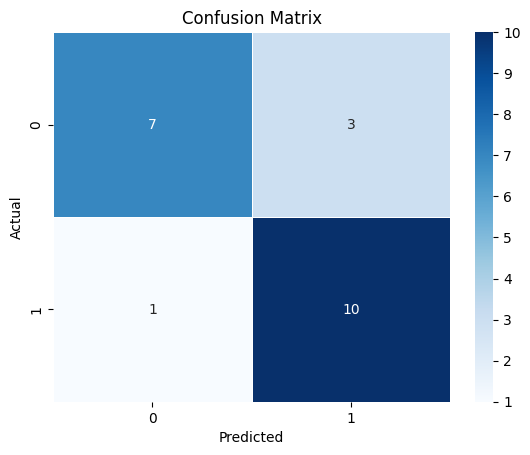

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", linewidths=.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [68]:
print("\nClassification Report Z-score:")
print(classification_report(target_test, y_pred_rf_zscore))
print("ROC-AUC Score Z-score:", roc_auc_score(target_test, y_pred_rf_zscore))


Classification Report Z-score:
              precision    recall  f1-score   support

           1       0.88      0.70      0.78        10
           2       0.77      0.91      0.83        11

    accuracy                           0.81        21
   macro avg       0.82      0.80      0.81        21
weighted avg       0.82      0.81      0.81        21

ROC-AUC Score Z-score: 0.8045454545454546


Ada beberapa poin yang perlu diperhatikan :
1. Akurasi
2. Presisi mengukur sejauh mana hasil positif yang diprediksi oleh model adalah benar.
3. Recall Recall mengukur sejauh mana model dapat mengidentifikasi dengan benar semua instance positif dalam data.
4. F1-Score adalah metrik gabungan yang mempertimbangkan presisi dan recall.

Dengan mempertimbangkan keempat poin di atas, diambil keputusan akan dilakukan modelling menggunakan support vector machine dengan normalisasi  minmaxscaler

### GRAFIK ROC-AUC
---

Metrik evaluasi ROC (Receiver Operating Characteristic) dan AUC (Area Under the ROC Curve) adalah alat evaluasi yang digunakan untuk mengukur kinerja model klasifikasi, terutama ketika model harus mengklasifikasikan antara dua kelas.

#### Receiver Operating Characteristic (ROC) Curve
ROC Curve adalah adalah kurva grafik yang menampilkan kinerja model klasifikasi pada berbagai tingkat cutoff (threshold) untuk membedakan antara kelas positif dan negatif. Didalam ROC kurva dapat diketahui sensitivity (True Positive Rate) dan False Positive Rate (1-Specificity), untuk menunjukkan seberapa baik model klasifikasi sehingga dapat membedakan antara kelas positif dan negatif.


#### Area Under the ROC Curve (AUC-ROC):
AUC-ROC adalah ukuran dari luas area di bawah kurva ROC.
- Interpretasi :
 Nilai AUC berkisar antara 0 hingga 1. Semakin dekat nilainya ke 1, semakin baik model dalam membedakan antara kelas positif dan negatif. Jika nilainya 0.5, itu menunjukkan klasifikasi acak.

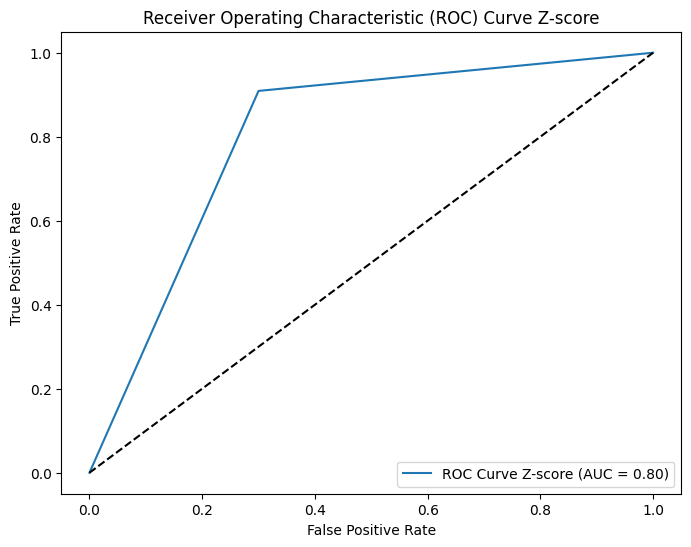

In [64]:
# Kurva ROC-AUC untuk model dengan data uji z-score
fpr_zscore, tpr_zscore, thresholds_zscore = roc_curve(target_test, y_pred_rf_zscore, pos_label=2)
plt.figure(figsize=(8, 6))
plt.plot(fpr_zscore, tpr_zscore, label='ROC Curve Z-score (AUC = %0.2f)' % roc_auc_score(target_test, y_pred_rf_zscore))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Z-score')
plt.legend(loc='lower right')
plt.show()


# --- DEPLOYMENT ---

code dilanjut pada file main.py untuk membangun sistem